# 융합캡스톤디자인

### 팀 시너지

목표 : 전압 변동에 따른 자동화 시스템 모델 구축

## 1. Import Libraries

In [52]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

## 2. Load Data

In [5]:
# 알람이력 데이터
data_alarm = pd.read_excel('./알람이력_2021년09월27일16시00분21초.xlsx',
                     header=4, index_col=0)

In [6]:
# 계측값이력 데이터
data_measured = pd.read_excel('./계측값이력_2021년09월27일15시54분40초.xlsx',
                     header=11, index_col=0)
# 최대값, 최소값, 평균값 행 제거
data_measured = data_measured[3:]

## 3. Preview

### 3.1 data_alarm

알람 이력 데이터셋

In [7]:
data_alarm.head(3)

,타입,알람 레벨,TimeStamp,Name,Value,Sub Value,Time Quality,Quality,Response,Cause,Additional Cause,Source Path
No,,,,,,,,,,,,
1,Bool-Indicator,알람레벨2,2021-03-01 09:30:12.618,345 #4Sh.R 7479 CB,열림,NaN,10001010,(Good)0000000000000,이벤트 수신(Report),10,NaN,<IEC61850>345kV-E378_LID3
2,Bool-Indicator,알람레벨1,2021-03-01 09:30:27.418,345 #4Sh.R 7475 DS,열림,NaN,10001010,(Good)0000000000000,이벤트 수신(Report),10,NaN,<IEC61850>345kV-E378_LID3
3,Bool-Indicator,알람레벨2,2021-03-01 10:22:58.385,345 #2Sh.R 7279 CB,열림,NaN,10001010,(Good)0000000000000,이벤트 수신(Report),10,NaN,<IEC61850>345kV-E378_LID3


In [8]:
data_alarm.tail(3)

,타입,알람 레벨,TimeStamp,Name,Value,Sub Value,Time Quality,Quality,Response,Cause,Additional Cause,Source Path
No,,,,,,,,,,,,
4167,Bool-Indicator,알람레벨1,2021-09-24 09:54:03.371,345 #3Sh.R 7375 DS,열림,NaN,10001010,(Good)0000000000000,이벤트 수신(Report),10,NaN,<IEC61850>345kV-E378_LID3
4168,Bool-Indicator,알람레벨2,2021-09-24 10:29:54.711,345 #2Sh.R 7279 CB,열림,차단부하 <197.67>,10001010,(Good)0000000000000,이벤트 수신(Report),10,NaN,<IEC61850>345kV-E378_LID3
4169,Bool-Indicator,알람레벨1,2021-09-24 10:30:07.713,345 #2Sh.R 7275 DS,열림,NaN,10001010,(Good)0000000000000,이벤트 수신(Report),10,NaN,<IEC61850>345kV-E378_LID3


In [9]:
data_alarm.columns

Index(['타입', '알람 레벨', 'TimeStamp', 'Name', 'Value', 'Sub Value',
       'Time Quality', 'Quality', 'Response', 'Cause', 'Additional Cause   ',
       'Source Path'],
      dtype='object')

In [10]:
data_alarm['Value'].value_counts()

열림        1161
닫힘        1102
동작         849
복귀         846
LOCAL       77
REMOTE      77
접지중         57
Name: Value, dtype: int64

### 3.2 data_measured

계측값 이력 데이터셋

In [11]:
data_measured.head(3)

,시각,345kV PT #1 BUS METERING P.T A상 전압,345kV PT #2 BUS METERING P.T A상 전압,Unnamed: 4,Unnamed: 5,Unnamed: 6
순서,,,,,,
1,2021년03월01일 00시,351.99,352.09,NaN,NaN,NaN
2,2021년03월01일 01시,354.13,354.23,NaN,NaN,NaN
3,2021년03월01일 02시,354.55,354.70,NaN,NaN,NaN


In [12]:
data_measured.tail(3)

,시각,345kV PT #1 BUS METERING P.T A상 전압,345kV PT #2 BUS METERING P.T A상 전압,Unnamed: 4,Unnamed: 5,Unnamed: 6
순서,,,,,,
4871,2021년09월24일 08시,352.67,352.56,NaN,NaN,NaN
4872,2021년09월24일 09시,353.87,353.76,NaN,NaN,NaN
4873,2021년09월24일 10시,353.14,352.98,NaN,NaN,NaN


In [13]:
data_measured.columns

Index(['시각', '345kV PT #1 BUS METERING P.T A상 전압',
       '345kV PT #2 BUS METERING P.T A상 전압', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6'],
      dtype='object')

In [14]:
data_measured['345kV PT #2 BUS METERING P.T A상 전압'].describe()

count    4873.000000
mean      354.314363
std         1.903205
min       347.700000
25%       353.030000
50%       354.290000
75%       355.590000
max       360.720000
Name: 345kV PT #2 BUS METERING P.T A상 전압, dtype: float64

## 4. Data Generation

### 4.1

In [15]:
# Name 중 'CB"만 유효
data_alarm = data_alarm.loc[data_alarm['Name'].apply(lambda x: x[-2:]) == 'CB']

In [16]:
data_alarm['TimeStamp']

No
1       2021-03-01 09:30:12.618
3       2021-03-01 10:22:58.385
6       2021-03-01 19:57:47.199
8       2021-03-01 23:39:09.335
9       2021-03-02 08:01:24.067
                 ...           
4160    2021-09-23 08:59:48.213
4163    2021-09-23 22:31:34.610
4164    2021-09-24 08:54:27.268
4166    2021-09-24 09:53:51.820
4168    2021-09-24 10:29:54.711
Name: TimeStamp, Length: 1207, dtype: object

In [17]:
data_alarm['date'] = data_alarm['TimeStamp'].apply(lambda x: x[:13]+'시')

In [18]:
data_measured['date'] = data_measured['시각'].apply(lambda x: x[:4]+'-'+x[5:7]+'-'+x[8:10]+''+x[11:14]+'시')

In [19]:
data_alarm.head(3)

,타입,알람 레벨,TimeStamp,Name,Value,Sub Value,Time Quality,Quality,Response,Cause,Additional Cause,Source Path,date
No,,,,,,,,,,,,,
1,Bool-Indicator,알람레벨2,2021-03-01 09:30:12.618,345 #4Sh.R 7479 CB,열림,NaN,10001010,(Good)0000000000000,이벤트 수신(Report),10,NaN,<IEC61850>345kV-E378_LID3,2021-03-01 09시
3,Bool-Indicator,알람레벨2,2021-03-01 10:22:58.385,345 #2Sh.R 7279 CB,열림,NaN,10001010,(Good)0000000000000,이벤트 수신(Report),10,NaN,<IEC61850>345kV-E378_LID3,2021-03-01 10시
6,Bool-Indicator,알람레벨2,2021-03-01 19:57:47.199,345 #2Sh.R 7279 CB,닫힘,NaN,10001010,(Good)0000000000000,이벤트 수신(Report),10,NaN,<IEC61850>345kV-E378_LID3,2021-03-01 19시


In [20]:
data_measured.head(3)

,시각,345kV PT #1 BUS METERING P.T A상 전압,345kV PT #2 BUS METERING P.T A상 전압,Unnamed: 4,Unnamed: 5,Unnamed: 6,date
순서,,,,,,,
1,2021년03월01일 00시,351.99,352.09,NaN,NaN,NaN,2021-03-01 00시
2,2021년03월01일 01시,354.13,354.23,NaN,NaN,NaN,2021-03-01 01시
3,2021년03월01일 02시,354.55,354.70,NaN,NaN,NaN,2021-03-01 02시


In [21]:
value = data_alarm[['date','Value']].groupby('date')['Value'].value_counts().unstack().fillna(0)
value

Value,닫힘,열림
date,,
2021-03-01 09시,0.0,1.0
2021-03-01 10시,0.0,1.0
2021-03-01 19시,1.0,0.0
2021-03-01 23시,1.0,0.0
2021-03-02 08시,0.0,1.0
...,...,...
2021-09-23 08시,0.0,1.0
2021-09-23 22시,1.0,0.0
2021-09-24 08시,0.0,1.0


In [22]:
data_measured[['345kV PT #1 BUS METERING P.T A상 전압','date']]

,345kV PT #1 BUS METERING P.T A상 전압,date
순서,,
1,351.99,2021-03-01 00시
2,354.13,2021-03-01 01시
3,354.55,2021-03-01 02시
4,355.12,2021-03-01 03시
5,354.91,2021-03-01 04시
...,...,...
4869,352.61,2021-09-24 06시
4870,353.97,2021-09-24 07시
4871,352.67,2021-09-24 08시


In [23]:
# 1 BUS
data = pd.merge(data_measured[['345kV PT #1 BUS METERING P.T A상 전압','date']], value, how='left', on='date')
data.fillna(0, inplace=True)
data.columns = ['전압','날짜','닫힘','열림']
data.head(5)

,전압,날짜,닫힘,열림
0,351.99,2021-03-01 00시,0.0,0.0
1,354.13,2021-03-01 01시,0.0,0.0
2,354.55,2021-03-01 02시,0.0,0.0
3,355.12,2021-03-01 03시,0.0,0.0
4,354.91,2021-03-01 04시,0.0,0.0


In [24]:
data.tail(5)

,전압,날짜,닫힘,열림
4868,352.61,2021-09-24 06시,0.0,0.0
4869,353.97,2021-09-24 07시,0.0,0.0
4870,352.67,2021-09-24 08시,0.0,1.0
4871,353.87,2021-09-24 09시,0.0,1.0
4872,353.14,2021-09-24 10시,0.0,1.0


In [25]:
# 열렸을 때, 전압이 평균적으로 5 낮아졌다고 가정 (수정)
열림_value = 5
닫힘_value = -5

In [26]:
기존전압 = pd.DataFrame(data['전압'] + data['닫힘']*닫힘_value + data['열림']*열림_value)
기존전압.columns = ['기존 전압']

In [27]:
df = pd.concat([data,기존전압],axis=1)
df.head(3)

,전압,날짜,닫힘,열림,기존 전압
0,351.99,2021-03-01 00시,0.0,0.0,351.99
1,354.13,2021-03-01 01시,0.0,0.0,354.13
2,354.55,2021-03-01 02시,0.0,0.0,354.55


In [28]:
df.tail(5)

,전압,날짜,닫힘,열림,기존 전압
4868,352.61,2021-09-24 06시,0.0,0.0,352.61
4869,353.97,2021-09-24 07시,0.0,0.0,353.97
4870,352.67,2021-09-24 08시,0.0,1.0,357.67
4871,353.87,2021-09-24 09시,0.0,1.0,358.87
4872,353.14,2021-09-24 10시,0.0,1.0,358.14


In [29]:
df['날짜'] = pd.to_datetime(df['날짜'].apply(lambda x: x[:-1]))
df.columns = ['voltage','date','closed','open','voltage_origin']
df.head(3)

,voltage,date,closed,open,voltage_origin
0,351.99,2021-03-01 00:00:00,0.0,0.0,351.99
1,354.13,2021-03-01 01:00:00,0.0,0.0,354.13
2,354.55,2021-03-01 02:00:00,0.0,0.0,354.55


In [30]:
df = df.drop(['closed','open','voltage'],axis=1)
df.index = df['date']
df.set_index('date', inplace=True)

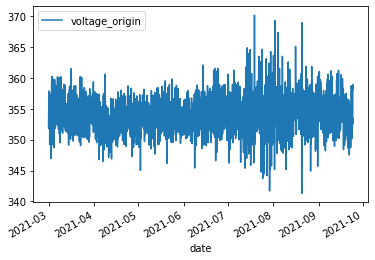

In [31]:
df.plot()
plt.show()

closed, open을 고려한 원래의 전압 예측 데이터<br>
(closed, open 시 얼만큼의 효과가 있는지 수정, 현재 +-5)<br>
시간 별 평균 데이터를 가지고 정규분포에서 난수 생성? (평균 : voltage_origin, 분산 : ?)

In [32]:
# 전압(origin)
# 열고, 닫힘 여부 (그 때의 전압 변화량)
# 사용한 탭 (데이터x 가정 필요)
# 시간 (전압 제어에 필요한, 현재 2초 가정)

In [33]:
# input : 현재 전압
# output : 리액터 활성 여부, 탭 수, 탭 간 이동 시간을 포함한 전체 안정화 시간

### 4.2

In [34]:
mu = 354
sigma = 20
interval = 2

In [35]:
react = -3
tab = -2

In [36]:
#def update_boundary(voltage_alarmed):
#    global boundary
#    boundary.append(voltage_alarmed)
#    return np.mean(boundary)

In [37]:
boundary = 360

In [38]:
np.random.seed(1234)
generation = pd.DataFrame(np.random.normal(mu, sigma, size=int(60/interval)),columns = ['voltage'])
generation['voltage'] = generation['voltage'].apply(lambda x: int(x))
generation.head()

,voltage
0,363
1,330
2,382
3,347
4,339


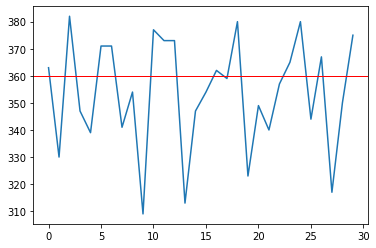

In [39]:
plt.plot(generation)
plt.axhline(y=boundary, color='r', linewidth=1)
plt.show()

In [40]:
generation['diff'] = boundary - generation['voltage']
generation.loc[generation['voltage'] <= boundary, 'diff'] = 0

In [41]:
generation['after_react'] = generation['diff'] - react
generation.loc[generation['diff'] == 0, 'after_react'] = 0
generation.head(10)

,voltage,diff,after_react
0,363,-3,0
1,330,0,0
2,382,-22,-19
3,347,0,0
4,339,0,0
5,371,-11,-8
6,371,-11,-8
7,341,0,0
8,354,0,0
9,309,0,0


In [45]:
generation['tap_level'] = generation['after_react'] / tab
generation['tap_level'] = generation['tap_level'].apply(lambda x: math.ceil(x))
generation.loc[generation['after_react'] >= 0, 'tap_level'] = 0
generation.head(10)

,voltage,diff,after_react,tap_level
0,363,-3,0,0
1,330,0,0,0
2,382,-22,-19,10
3,347,0,0,0
4,339,0,0,0
5,371,-11,-8,4
6,371,-11,-8,4
7,341,0,0,0
8,354,0,0,0
9,309,0,0,0


In [46]:
generation['output'] = generation['tap_level'].apply(lambda x: ('React On & tap_level : '+str(x)))
generation.loc[(generation['diff']<0)&(generation['after_react']>0),'output'] = 'React On'
generation.loc[generation['diff']==0, 'output'] = 'None'

In [47]:
generation.head(10)

,voltage,diff,after_react,tap_level,output
0,363,-3,0,0,React On & tap_level : 0
1,330,0,0,0,None
2,382,-22,-19,10,React On & tap_level : 10
3,347,0,0,0,None
4,339,0,0,0,None
5,371,-11,-8,4,React On & tap_level : 4
6,371,-11,-8,4,React On & tap_level : 4
7,341,0,0,0,None
8,354,0,0,0,None
9,309,0,0,0,None


( (voltage - boundary) // min(-react, 2*(-react)) ) // min(tap, 18*tap)

x : voltage<br>
y : output

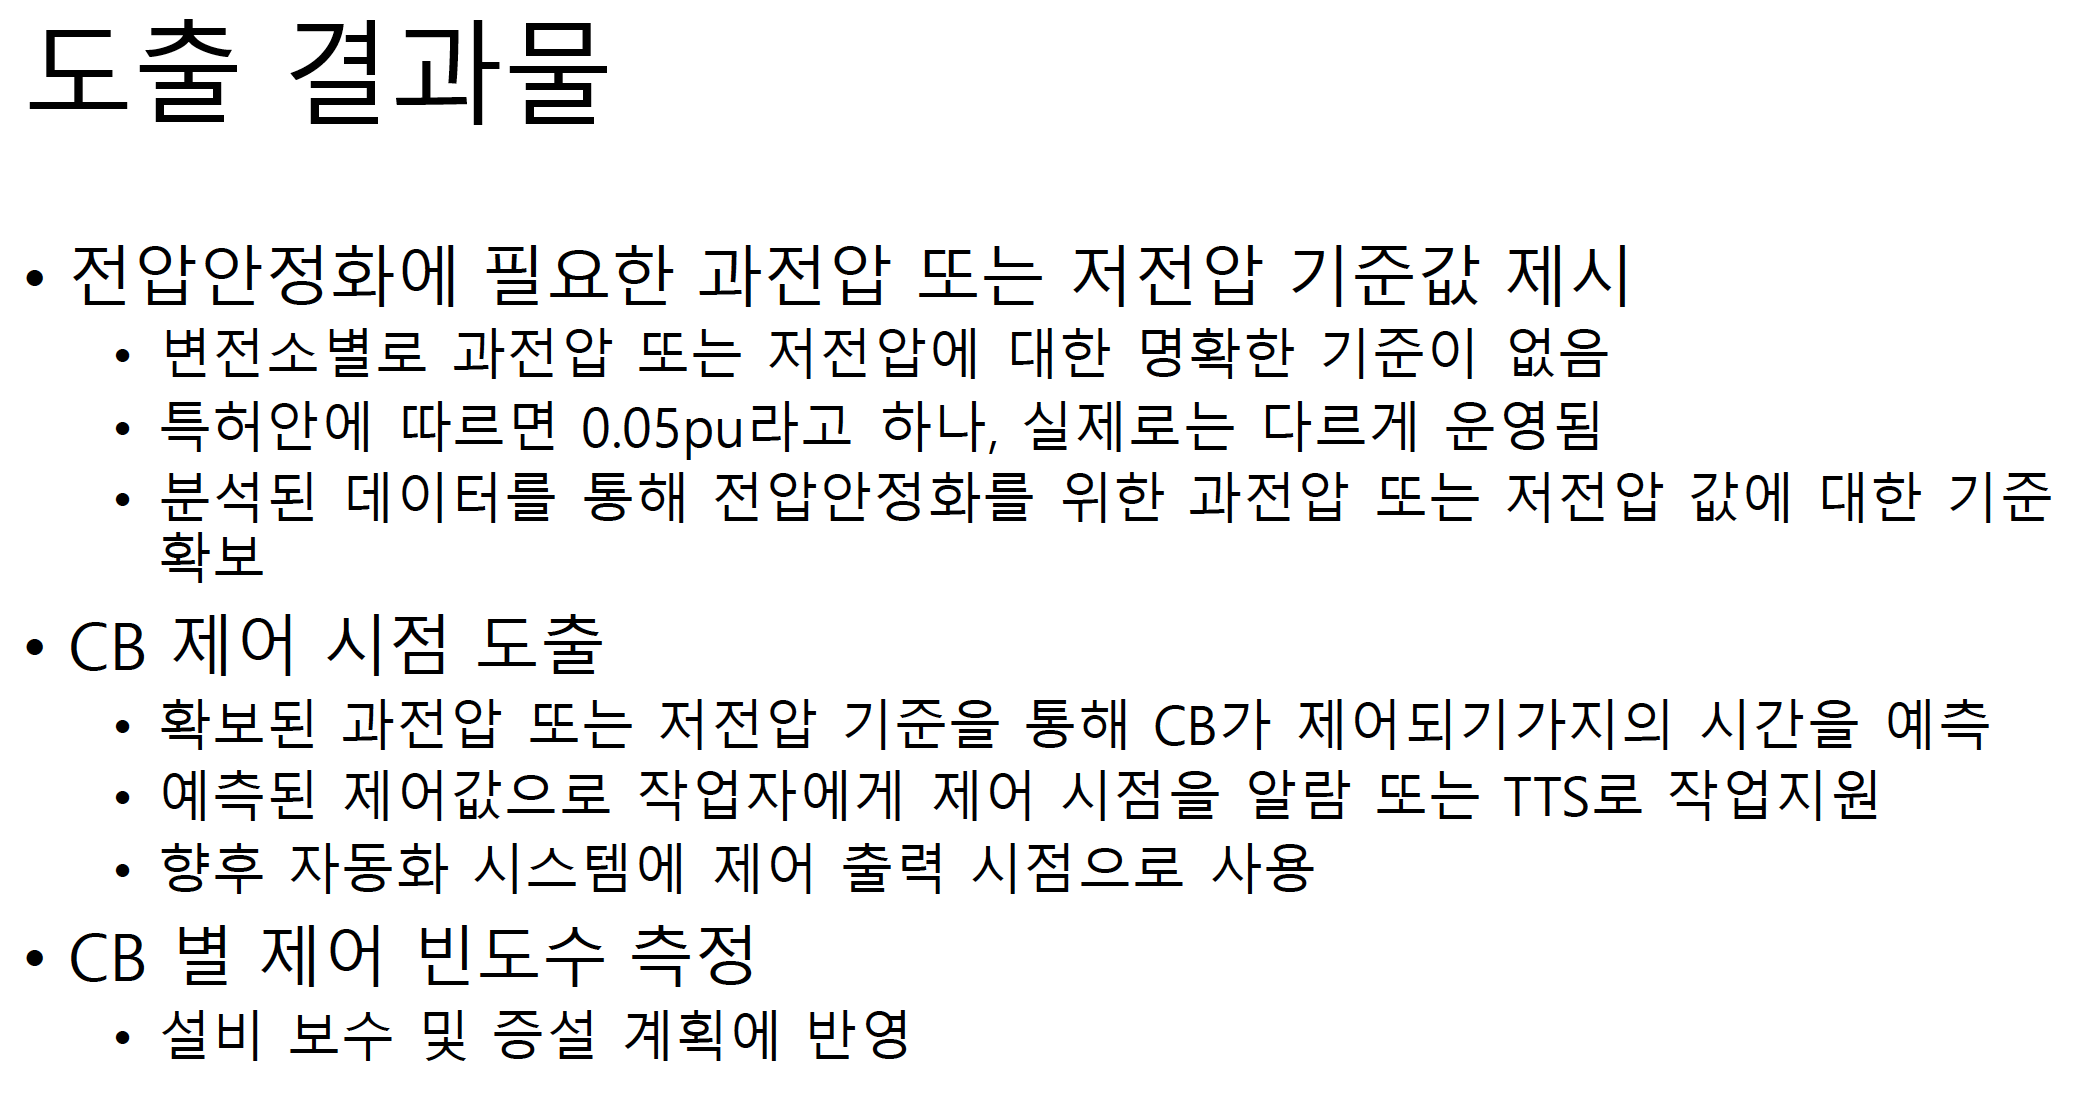

In [53]:
Image("융캡 알림.png")

In [54]:
# 독립변수를 전압 하나만으로 머신러닝의 필요성이 없어보임